In [286]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

from rw import scan_handler

rc('text', usetex=False)
rc('font', family='serif', size=20)
rc('figure', figsize=(12,8))
rc('axes',linewidth=2)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Reader

In [287]:
file_path = "/home/cmsdaq/Analysis/Data/RUN_5/processed_data/BAW_5_8.scan"    # path to the .scan file
reader = scan_handler.ScanReader(file_path)        # create the object

In [288]:
# get the name list of all the resonances parameters 
print(reader.get_parameters_tags())

['C_baw', 'L_baw', 'Q', 'R_baw', 'R_par', 'asim', 'bw', 'depth', 'er_Q', 'er_asim', 'er_f0', 'er_gamma', 'er_norm', 'f0', 'fcenter', 'fmax', 'fmin', 'gamma', 'input_power', 'norm', 'npt', 'offset_at_peak', 'span', 'sweep', 'x']


In [289]:
# get the parameter Q for all the resonances as an array
R = reader.get_parameters('f0')
print(np.sort(R))

[ 1.28840286  1.4589987   1.52683523  1.6482061   1.86793435  1.91108699
  1.98034131  2.00252424  2.07586311  2.68771885  2.7808133   2.82086836
  3.00922379  3.06867646  3.09811235  3.10977186  3.13209922  3.15243155
  3.21772366  3.28285789  3.42422401  3.45901161  3.89376554  4.12840086
  4.59268131  4.60946338  4.8178647   4.99990489  5.0000318   5.08689922
  5.09009764  5.09399574  5.17414303  5.18151942  5.18959811  5.20035004
  5.24099047  5.35907009  5.36666943  5.47715134  5.50497977  5.54797485
  5.57398864  5.6219672   5.64502495  5.64620183  5.67238414  5.72393825
  5.76056663  5.96280251  6.04818861  6.45737049  6.73751285  6.91702582
  7.01244836  7.61545002  8.29690151  8.30893729  8.40263462  8.40937352
  8.49223923  8.4957002   8.49917316  8.50804628  8.57862547  8.58201255
  8.58544928  8.59282688  8.59440135  8.60509351  8.66260984  8.66913254
  8.67806226  8.68877015  8.70032256  8.74480755  8.75117128  8.78204778
  8.80851378  9.10540126  9.17845189  9.19947386  9

In [290]:
# get (as a python dictionary) all the resonance parameter. 
# you can get a resonance from its raw name
#           reader.get_resonance(name="resonance_10")
# you can get a resonance from its position inside the .scan
# e.g.: get the seventh resonance
#           reader.get_resonance(loc=7)
# you can get the resonance from its frequency (the middle frequency). 
# it gets the closest resonance to the selected frequency

resonance = reader.get_resonance(freq=5.59)

In [291]:
print(R.size) #numero picchi

240


In [292]:
for key in resonance.keys():
    print(key)
    if key != "freq" and  key != "power" and key!= "phase":
        print(resonance[key])
print("The resonance called ",resonance['reso_name'] ," has a Q = ", resonance['Q'],  "and freq=", resonance['f0'])

C_baw
1.353750261761147e-20
L_baw
60223.99361025768
Q
3185946.9437893517
R_baw
662028.9172591876
R_par
49.99622401509121
asim
2.0623578957585895
bw
30.0
depth
0.0003279964596115015
er_Q
0.005319832115254395
er_asim
0.04996681766475673
er_f0
9.30733759651172e-09
er_gamma
7.546982040253286e-09
er_norm
8.546488924785567e-12
f0
5.573988638738178
fcenter
5574000.0
fmax
5574050.0
fmin
5573950.0
gamma
8.747773797055923e-07
input_power
-30.0
norm
7.929187871702175e-10
npt
801.0
offset_at_peak
0.0007819670537488332
span
100.0
sweep
46.9386
x
0.24998111971900452
freq
phase
power
reso_name
resonance_250
The resonance called  resonance_250  has a Q =  3185946.9437893517 and freq= 5.573988638738178


In [293]:
Q_picchi = reader.get_parameters('Q')
n=0
for n_picco in range (R.size):
    f_picco = R[n_picco]
    Q_picco = Q_picchi[n_picco]
    if Q_picco>1e6:
        ciccio = reader.get_resonance (freq = f_picco)
        n=n+1
        print("The resonance called ",ciccio['reso_name'] ," has a Q = ", ciccio['Q'],  "and freq=", ciccio['f0'])
      
print(n, "risonanze")
    

The resonance called  resonance_1111  has a Q =  1001437.4115886237 and freq= 15.67390911197049
The resonance called  resonance_1117  has a Q =  1051626.0690135572 and freq= 15.692081732225516
The resonance called  resonance_1123  has a Q =  1239385.5691073083 and freq= 15.755153697526934
The resonance called  resonance_1129  has a Q =  1027292.1172346994 and freq= 15.765636861152476
The resonance called  resonance_1141  has a Q =  1053626.6328376199 and freq= 15.838158718519882
The resonance called  resonance_1147  has a Q =  1333471.0790638197 and freq= 15.841276028552471
The resonance called  resonance_1150  has a Q =  1222239.8839597572 and freq= 15.844790011492936
The resonance called  resonance_1156  has a Q =  1035571.4145650257 and freq= 15.861721844305947
The resonance called  resonance_1162  has a Q =  1212772.4186617422 and freq= 15.89549092617628
The resonance called  resonance_1168  has a Q =  1003381.1050800097 and freq= 15.921058061939604
The resonance called  resonance_

## Useful(?) examples

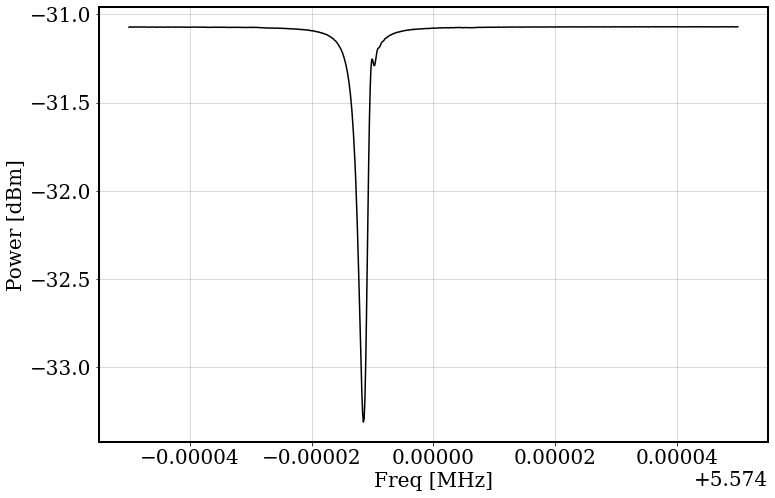

In [294]:
# plot the resonance at 5.66 MHz
reso = reader.get_resonance(freq=5.59)

plt.plot(reso['freq']*1e-6,reso['power'],c='k')
plt.xlabel('Freq [MHz]')
plt.ylabel('Power [dBm]')
plt.grid(alpha=0.6)
plt.show()

In [295]:
print("R_baw", reso['R_baw'])
print("R_par", reso['R_par'])
print(reso['x'])

print("Profondità buca:",reso['depth'], "W")


print("Capacità equivalente: ", reso['C_baw'], "F")
print("Induttanza equivalente: ",reso['L_baw'], "H")

print("Frequenza: " ,reso['f0'], "MHz")

R_baw 662028.9172591876
R_par 49.99622401509121
0.24998111971900452
Profondità buca: 0.0003279964596115015 W
Capacità equivalente:  1.353750261761147e-20 F
Induttanza equivalente:  60223.99361025768 H
Frequenza:  5.573988638738178 MHz


conversion is: dBm-W
Parametro  1 :  -3.606033323583898e-10  +/-  5.742665869381193e-10
Parametro  2 :  3.935025447158006e-06  +/-  3.97136973979149e-06
Parametro  3 :  5.574006085880063  +/-  3.398803937846711e-06
Parametro  4 :  0.030488417027564628  +/-  0.7094304453941231
Parametro  5 :  -0.1691890188950405  +/-  3.954347254939952
Parametro  6 :  2.162635985979994  +/-  5.552632270540696
Q = 7.08e+05  +/-  0.43186556014556216


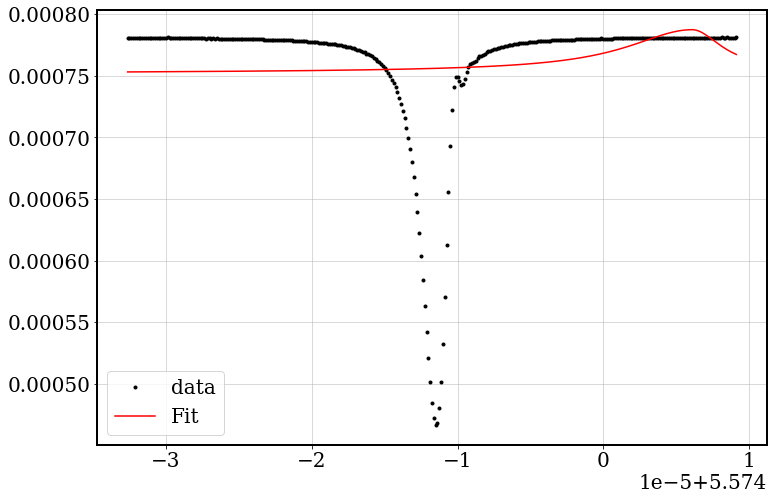

In [297]:
from process import utils
utils.fit_resonance(reso['freq']*1e-6, reso['power'],verbose=True)


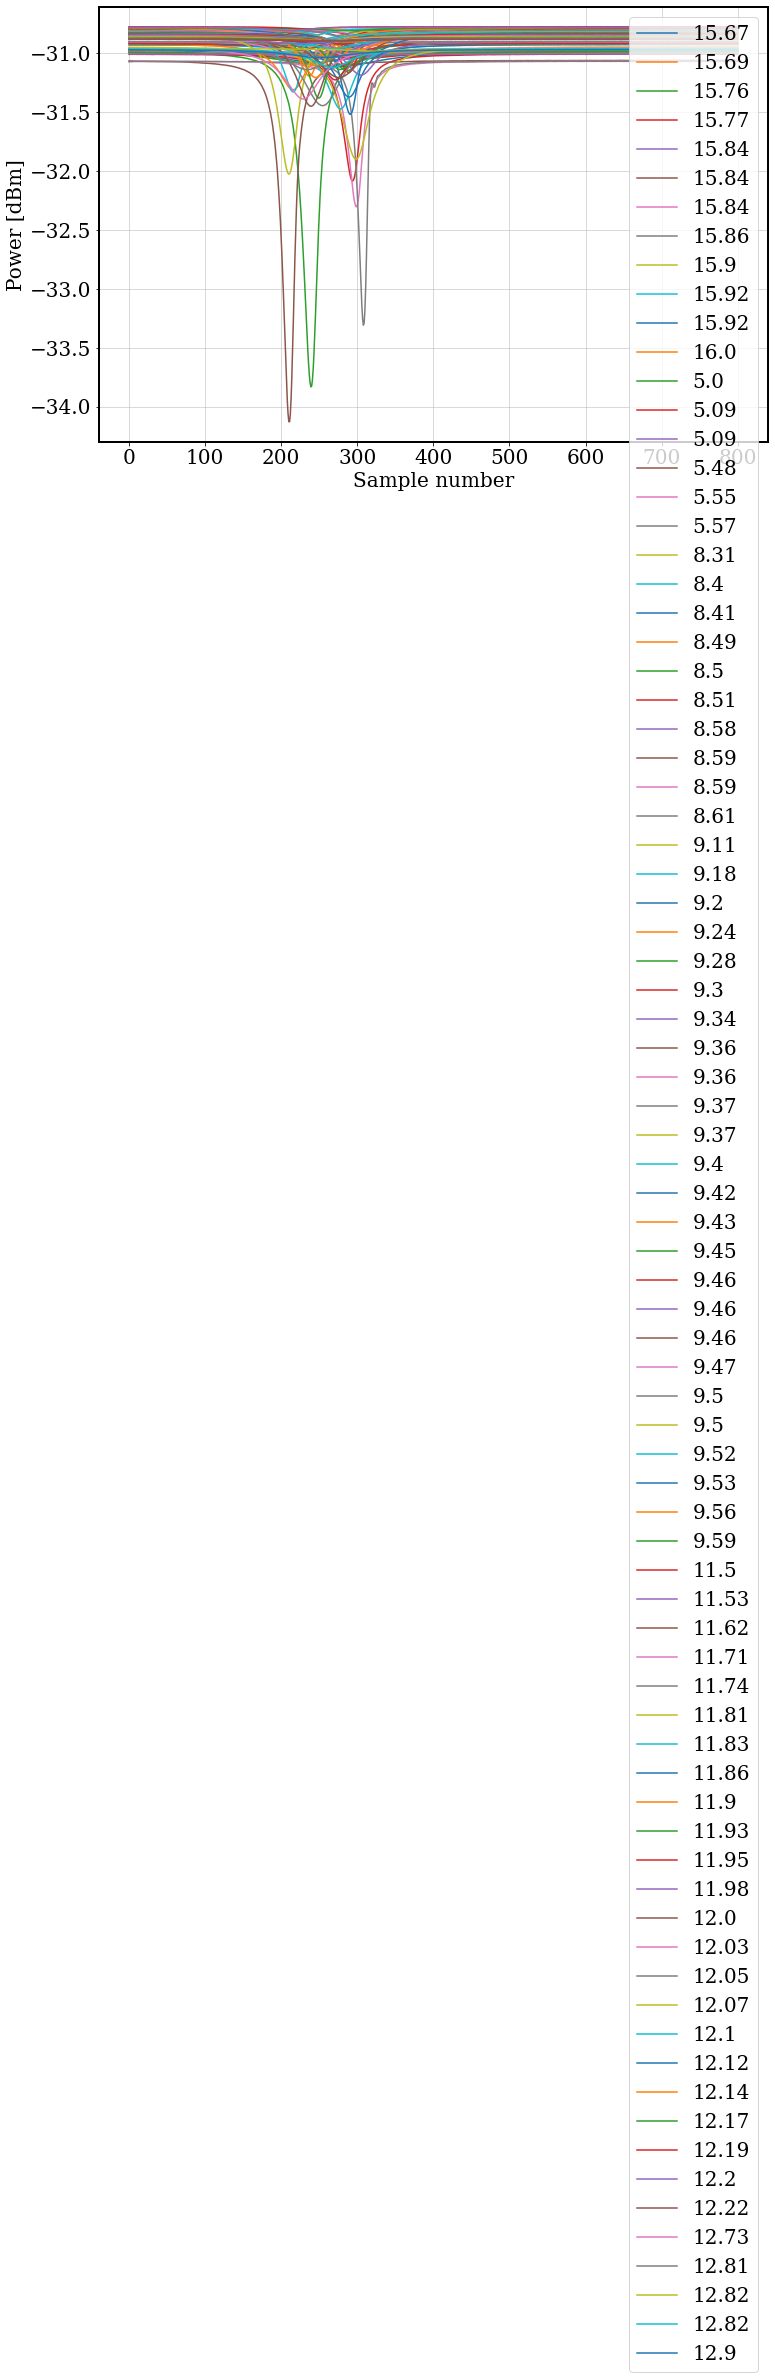

In [270]:
# plot all the resonance with a Q greater than 1e7
Q = reader.get_parameters('Q')
loc = np.where(Q>=1e6)[0]

for l in loc:
    power = reader.get_resonance(loc=l)['power']
    f0 = reader.get_resonance(loc=l)['f0']
    plt.plot(power,label=str(np.round(f0,2)))
    
plt.legend()
plt.xlabel('Sample number')
plt.ylabel('Power [dBm]')
plt.grid(alpha=0.6)
plt.show()

# RICORDA DI CAMBIARE IL NOME DELL'IMMAGINE

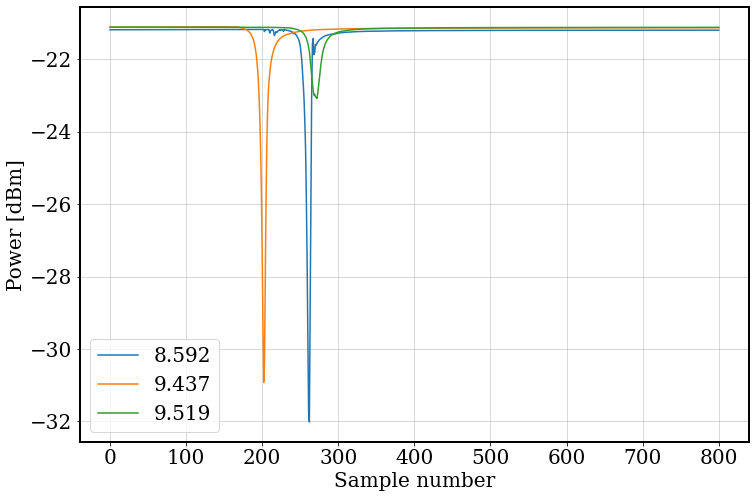

In [189]:
# plot all the resonance in a range
Q = reader.get_parameters('Q')
loc = np.where(Q>5e6)[0]

for l in loc:
    power = reader.get_resonance(loc=l)['power']
    f0 = reader.get_resonance(loc=l)['f0']
    if f0 > 6.55 and f0 < 10.:
        plt.plot(power,label=str(round(f0,3)))

plt.legend()
plt.xlabel('Sample number')
plt.ylabel('Power [dBm]')
plt.grid(alpha=0.6)
plt.savefig("9cMhz.png") 
plt.show()

In [40]:
R = reader.get_parameters('R_baw')
loc = np.where(R<-50)[0]

for l in loc:
    power = reader.get_resonance(loc=l)['power']
    f0 = reader.get_resonance(loc=l)['f0']
    plt.plot(power,label=str(np.round(f0)))

    plt.legend()
    plt.xlabel('Sample number')
    plt.ylabel('Power [dBm]')
    plt.grid(alpha=0.6)
    plt.show()    


conversion is: dBm-W
Parametro  1 :  -5.283698761998723e-10  +/-  2.91170018470166e-09
Parametro  2 :  5.29734332729858e-06  +/-  1.0324764091369733e-05
Parametro  3 :  12.015951173101536  +/-  6.751428767661129e-07
Parametro  4 :  -21.350860472840424  +/-  58.448926702086304
Parametro  5 :  256.557633402193  +/-  702.3197324159866
Parametro  6 :  99.99999989514232  +/-  560.639649388824
Q = 1.13e+06  +/-  0.06372466678743201


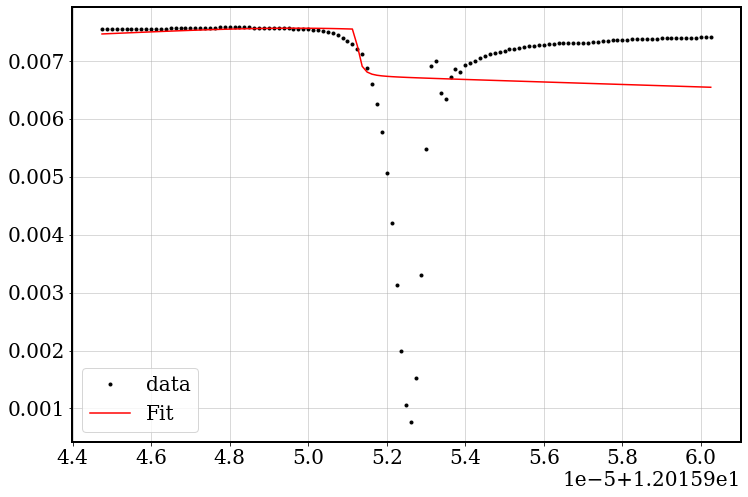

conversion is: dBm-W
Parametro  1 :  -5.331493625053416e-10  +/-  3.0029887807202098e-09
Parametro  2 :  5.934424130287706e-06  +/-  9.451652560054974e-06
Parametro  3 :  13.195912641668139  +/-  7.715562553164731e-07
Parametro  4 :  -17.74481721564303  +/-  40.56016437988859
Parametro  5 :  234.16549129522505  +/-  535.2286103010206
Parametro  6 :  99.99999999999999  +/-  565.5711568122784
Q = 1.11e+06  +/-  0.06500683456296674


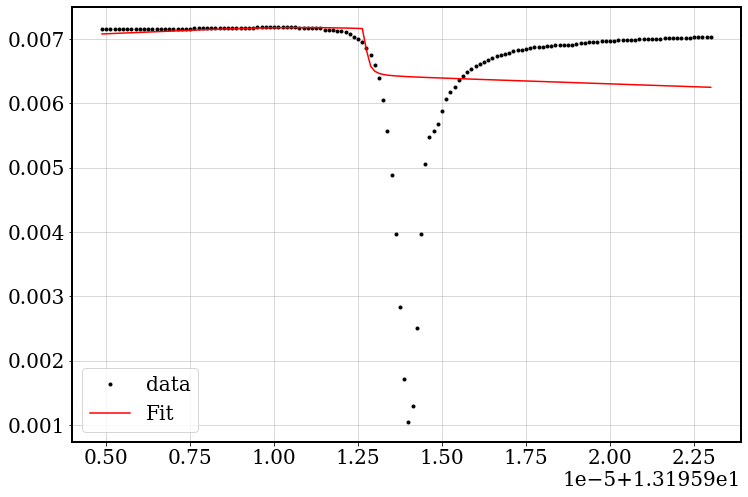

conversion is: dBm-W
Parametro  1 :  -7.750223972324884e-11  +/-  5.160183722908447e-10
Parametro  2 :  3.928822659842766e-06  +/-  6.11201777679298e-06
Parametro  3 :  13.264113291443548  +/-  2.137965775311061e-06
Parametro  4 :  -0.6122411437431191  +/-  2.5943193182215647
Parametro  5 :  8.127909547339037  +/-  34.411364409269176
Parametro  6 :  20.861805700871265  +/-  127.92599611905277
Q = 1.69e+06  +/-  0.27208733511496674


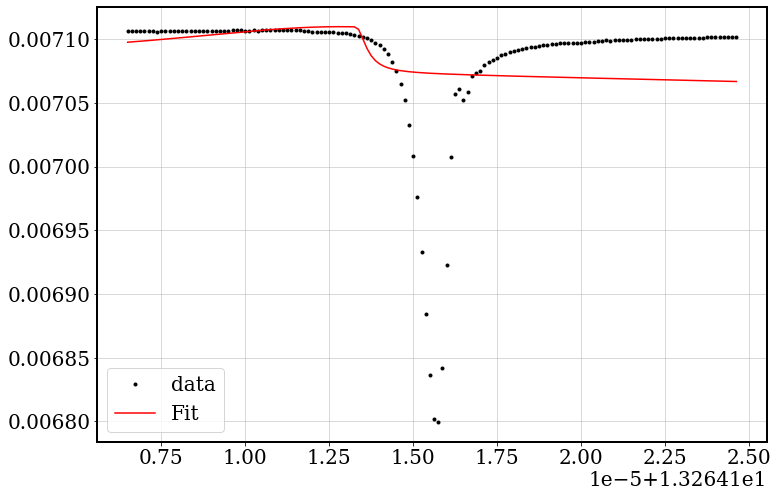

conversion is: dBm-W
Parametro  1 :  -2.96193547190962e-10  +/-  2.3575106268808162e-09
Parametro  2 :  6.798235970479796e-06  +/-  1.1119290410873856e-05
Parametro  3 :  13.275296811024363  +/-  1.189312826634452e-06
Parametro  4 :  -6.568188906513834  +/-  16.812169693821797
Parametro  5 :  87.20143086734264  +/-  223.1866527253968
Parametro  6 :  98.24711412922832  +/-  765.7410103461906
Q = 9.76e+05  +/-  0.08747216423587496


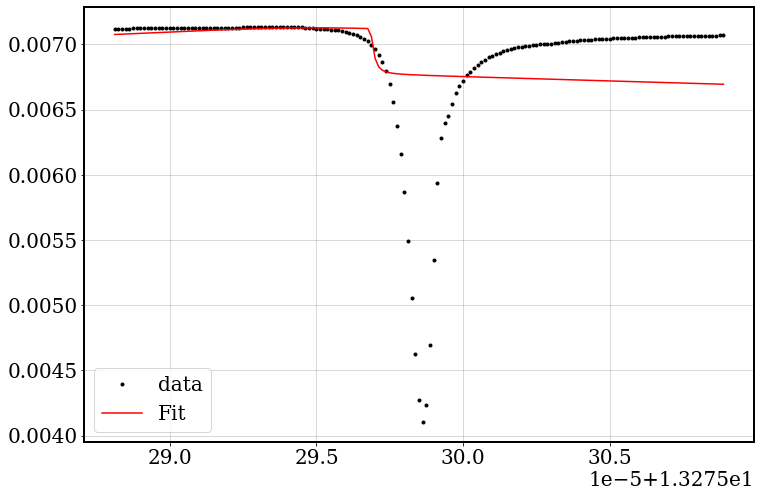

conversion is: dBm-W
Parametro  1 :  -1.0229918776168034e-09  +/-  5.109893486788389e-09
Parametro  2 :  9.170237336250537e-06  +/-  8.422842327906076e-06
Parametro  3 :  16.08554005851902  +/-  9.766710774671866e-07
Parametro  4 :  -3.8847826239431176  +/-  19.491612703465744
Parametro  5 :  62.49495295850542  +/-  313.53328750227394
Parametro  6 :  99.99999999999999  +/-  485.85138614348756
Q = 8.77e+05  +/-  0.05325222465170815


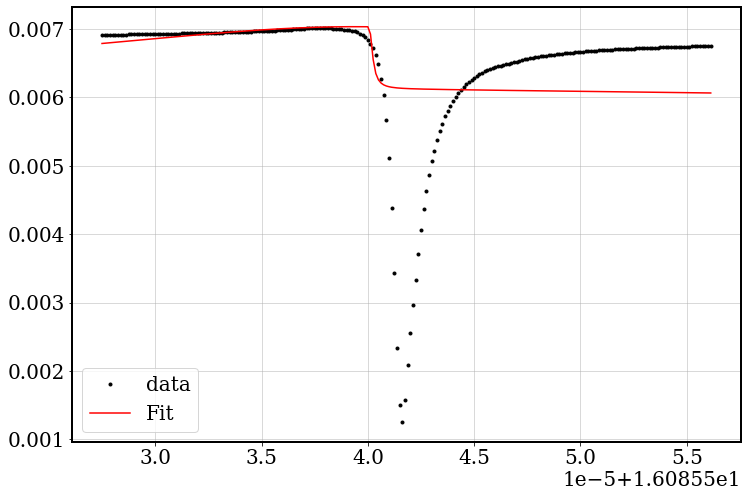

conversion is: dBm-W
Parametro  1 :  -5.735478671087646e-10  +/-  2.96532588381917e-09
Parametro  2 :  8.563980686971008e-06  +/-  9.165814084034613e-06
Parametro  3 :  16.154545088638333  +/-  9.470794740810827e-07
Parametro  4 :  -4.493228475664526  +/-  14.561928740917187
Parametro  5 :  72.59244988272467  +/-  235.24145009381485
Parametro  6 :  99.99999999999999  +/-  505.1791331920782
Q = 9.43e+05  +/-  0.055294349013094275


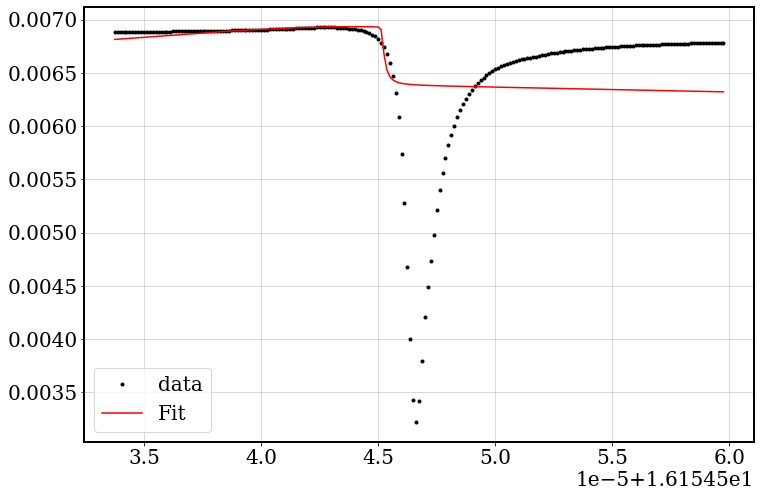

conversion is: dBm-W
Parametro  1 :  -6.400998415212926e-12  +/-  1.0111312448135305e-11
Parametro  2 :  6.985131109549127e-06  +/-  9.964598617691522e-06
Parametro  3 :  16.16157950873598  +/-  3.539026934224612e-07
Parametro  4 :  -0.11390192285463913  +/-  0.3188370079361418
Parametro  5 :  1.8476686210527662  +/-  5.152911680510891
Parametro  6 :  99.99999999999999  +/-  0.001410452112865629
Q = 1.16e+06  +/-  0.0253325734262066


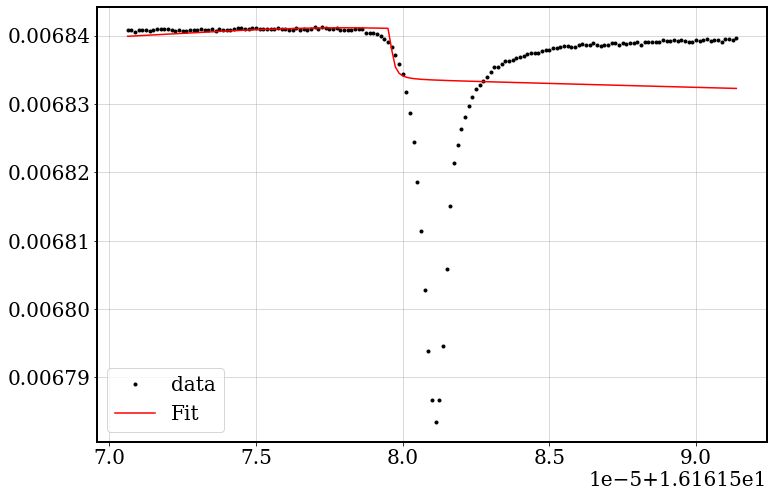

conversion is: dBm-W
Parametro  1 :  -5.226875893646696e-10  +/-  2.3076536711722303e-09
Parametro  2 :  6.812456037606269e-06  +/-  8.328233396076482e-06
Parametro  3 :  16.171736129734953  +/-  7.000618332961457e-07
Parametro  4 :  -8.364622491650374  +/-  23.617821865901753
Parametro  5 :  135.276779361926  +/-  381.94133151760377
Parametro  6 :  99.99999999999999  +/-  443.0891086276349
Q = 1.19e+06  +/-  0.051381016584946745


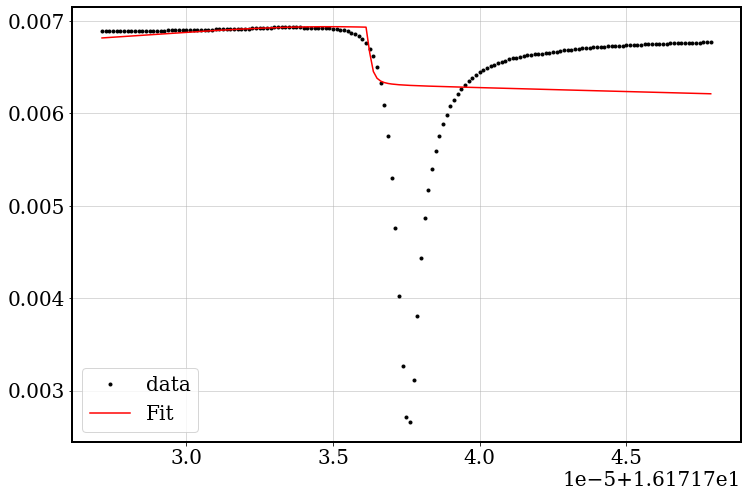

In [157]:
#Q = np.sort(reader.get_parameters('Q'))[-1]
#print(Q)
Q = reader.get_parameters('Q')
loc = np.where(Q>1.5e7)[0]

for l in loc:
    power = reader.get_resonance(loc=l)['power']
    freq = reader.get_resonance(loc=l)['freq']

    utils.fit_resonance(freq*1e-6, power, verbose=True)



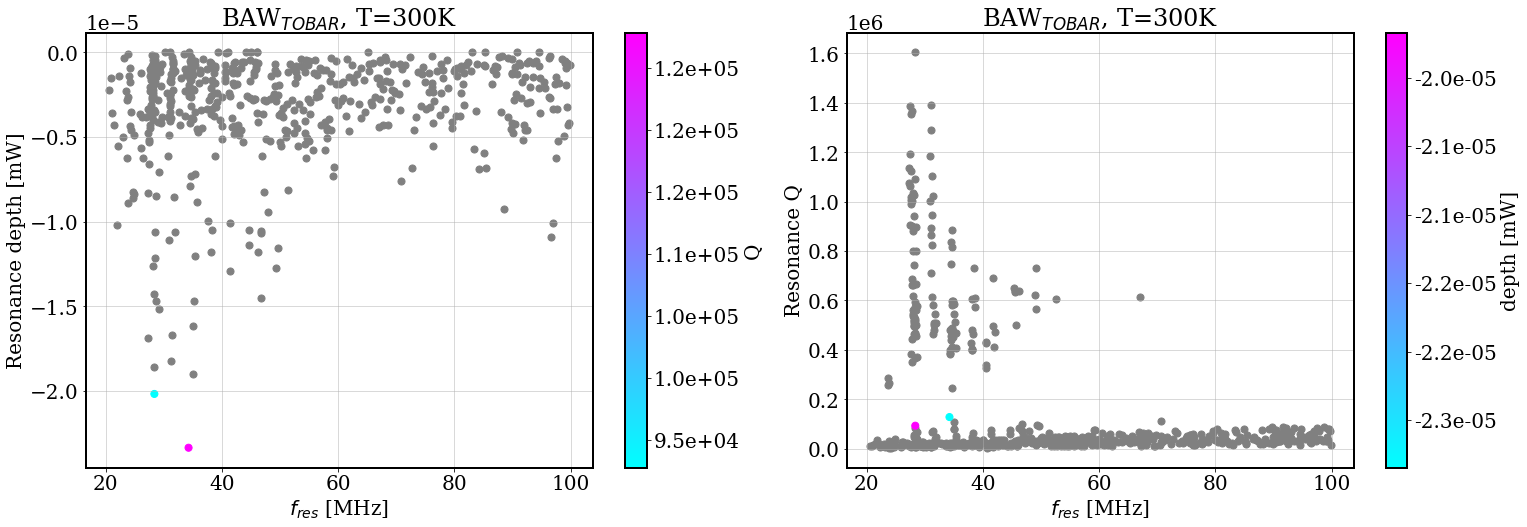

In [43]:
from matplotlib  import cm
depth = reader.get_parameters('depth')
Q = reader.get_parameters('Q')
peak_pos = reader.get_parameters('f0')


depth_thr = 0.00002 #è l'altezza dei picchi sotto la quale non plotta il Q valore
ii = np.where(depth>depth_thr)[0]
ii2 = np.where(depth<=depth_thr)[0]
ii3 = np.where((Q != -2) & (Q < 4e6) )[0]

ii = np.intersect1d(ii,ii3)
ii2 = np.intersect1d(ii2,ii3)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(25)

d = ax1.scatter(peak_pos[ii2],-depth[ii2],s=50,          marker = 'o', color='grey')
d = ax1.scatter(peak_pos[ii], -depth[ii], s=50, c=Q[ii], marker = 'o', cmap = cm.cool )
ax1.set_title(r'BAW$_{TOBAR}$, T=300K')
fig.colorbar(d,label='Q',format='%.1e', ax=ax1)
ax1.set_xlabel(r'$f_{res}$ [MHz]')
ax1.set_ylabel('Resonance depth [mW]')

e = ax2.scatter(peak_pos[ii2],Q[ii2],s=50,marker='o',color='grey')
e = ax2.scatter(peak_pos[ii], Q[ii],s=50, c=-depth[ii], marker = 'o', cmap = cm.cool )
ax2.set_title(r'BAW$_{TOBAR}$, T=300K')
fig.colorbar(e,label='depth [mW]',format='%.1e', ax=ax2)
ax2.set_xlabel(r'$f_{res}$ [MHz]')
ax2.set_ylabel('Resonance Q')

ax1.grid(alpha=0.6)
ax2.grid(alpha=0.6)

#plt.savefig('Scan_22.png')
plt.show()

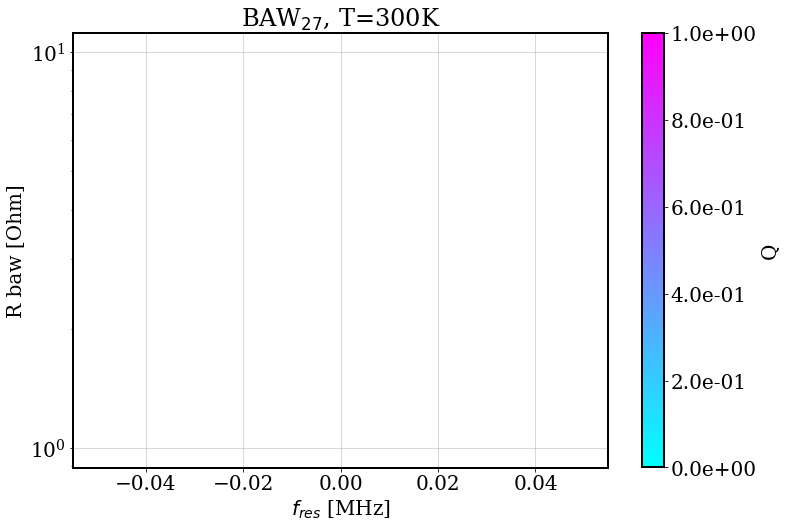

In [57]:
depth = reader.get_parameters('depth')
Q = reader.get_parameters('Q')
peak_pos = reader.get_parameters('f0')
R = reader.get_parameters('R_baw')
C = reader.get_parameters('C_baw')
L = reader.get_parameters('L_baw')

depth_thr = 0.02 #è l'altezza dei picchi sotto la quale non plotta il Q valore
ii = np.where(depth>depth_thr)[0]
ii2 = np.where(depth<=depth_thr)[0]
ii3 = np.where(Q > 1e6)[0]

ii = np.intersect1d(ii,ii3)
ii2 = np.intersect1d(ii2,ii3)

fig = plt.figure()
ax = fig.add_subplot(111)
#d =ax.scatter(peak_pos[ii2],R[ii2],s=50,marker='o',color='grey')
d =ax.scatter(peak_pos[ii],R[ii],s=50,c=Q[ii], marker = 'o', cmap = cm.cool )

plt.title(r'BAW$_{27}$, T=300K')
plt.colorbar(d,label='Q',format='%.1e')
plt.xlabel(r'$f_{res}$ [MHz]')
plt.ylabel('R baw [Ohm]')
plt.grid(alpha=0.6)
plt.yscale('log')
#plt.savefig('Scan_22.png')
plt.show()

